In [22]:
import pandas as pd
import json
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

## JSONL file preview

In [2]:
file_dicts = {
    'deepseek_cmts': 'reddit_text_data/r_DeepSeek_comments.jsonl',
    # 'deepseek_posts': 'reddit_text_data/r_DeepSeek_posts.jsonl',
    'gpt_cmts': 'reddit_text_data/r_ChatGPT_comments.jsonl',
    # 'gpt_posts': 'reddit_text_data/r_ChatGPT_posts.jsonl'
    }

In [3]:
def load_jsonl_files(file_path):
    """
    Load multiple JSONL files from a directory pattern.
    
    Args:
        file_path: file path for the text jsonl data
    
    Returns:
        A dictionary where keys are filenames (without path) and values are lists of parsed JSON objects
    """
    data = []
        
    with open(file_path, 'r') as file:
        for line in file:
            parsed_line = json.loads(line)
            data.append(parsed_line)
    
    return data

In [4]:
# comments preview
deepseek_cmts  = load_jsonl_files('reddit_text_data/r_deepseek_comments.jsonl')
deepseek_cmts[0]

{'_meta': {'removal_type': 'removed',
  'retrieved_2nd_on': 1732288706,
  'was_deleted_later': True},
 'all_awardings': [],
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'associated_award': None,
 'author': 'Wooden_Flamingo_4759',
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_1dclpy0fv6',
 'author_is_blocked': False,
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'banned_at_utc': None,
 'banned_by': None,
 'body': "at least you know it won't be passed to Israel?",
 'can_gild': False,
 'can_mod_post': False,
 'collapsed': False,
 'collapsed_because_crowd_control': None,
 'collapsed_reason': None,
 'collapsed_reason_code': None,
 'comment_type': None,
 'controversiality': 0,
 'created': 1732159096,
 'created_utc': 1732159096,
 'dist

In [5]:
len(deepseek_cmts)

32517

-> for collection:
- subreddit
- created_utc
- body
- author

In [6]:
# # posts preview
# deepseek_posts  = load_jsonl_files('reddit_text_data/r_deepseek_posts.jsonl')
# deepseek_posts[0]

-> for collection:
- subreddit
- created_utc
- selftext
- author

## Raw dataframe preview (subreddit, created_time, text, author)

In [7]:
def extract_columns(full_list, is_cmts):
    extracted_data = []
    final_col_names = ['subreddit', 'created_utc', 'text', 'author']
    if is_cmts:
        col_names = ['subreddit', 'created_utc', 'body', 'author']
    else: # posts
        col_names = ['subreddit', 'created_utc', 'selftext', 'author']
    for row in full_list:
        row_data = {}
        for name in col_names:
            row_data[name] = row[name]
        extracted_data.append(row_data)
    df = pd.DataFrame(extracted_data, columns=col_names)
    df_renamed = df.rename(columns=dict(zip(col_names, final_col_names)))
    return df_renamed

In [8]:
df_deepseek_cmts = extract_columns(deepseek_cmts, True)
df_deepseek_cmts

,subreddit,created_utc,text,author
0,DeepSeek,1732159096,at least you know it won't be passed to Israel?,Wooden_Flamingo_4759
1,DeepSeek,1735305466,Same,No_Seaworthiness9278
2,DeepSeek,1735325877,You are over thinking this.,emprezario
3,DeepSeek,1735328898,Those LLMs are notorious to not know who they ...,Anuclano
4,DeepSeek,1735339233,me too,Popular-Dance-292
...,...,...,...,...
32512,DeepSeek,1740872824,"Yeah, auto-complete somehow is also one way to...",Fanyang-Meng
32513,DeepSeek,1740872898,I don't need luck for my career but thanks!,Specter_Origin
32514,DeepSeek,1740873401,Also that API discount?? during peak USA hours...,revotfel
32515,DeepSeek,1740873461,I found it well-informed and comprehensive. We...,jarec707


In [9]:
nan_summary = df_deepseek_cmts.isna().sum()
nan_summary

subreddit      0
created_utc    0
text           0
author         0
dtype: int64

### concat comments & posts of r/deepseek & r/chatgpt

In [10]:
def concat_dfs(file_dict):
    sub_dfs = []
    for key, file in file_dicts.items():
        data = load_jsonl_files(file)
        is_comment = re.search(r'_cmts$', key)
        df = extract_columns(data, is_comment)
        sub_dfs.append(df)
    df_total = pd.concat(sub_dfs, ignore_index=True)
    return df_total

In [11]:
df_total = concat_dfs(file_dicts)

In [12]:
df_total

,subreddit,created_utc,text,author
0,DeepSeek,1732159096,at least you know it won't be passed to Israel?,Wooden_Flamingo_4759
1,DeepSeek,1735305466,Same,No_Seaworthiness9278
2,DeepSeek,1735325877,You are over thinking this.,emprezario
3,DeepSeek,1735328898,Those LLMs are notorious to not know who they ...,Anuclano
4,DeepSeek,1735339233,me too,Popular-Dance-292
...,...,...,...,...
641956,ChatGPT,1740873505,Yeah I always go back to the extreme growth an...,LiteSoul
641957,ChatGPT,1740873508,it's designed to be a yes-man and people-pleas...,Early_Situation_6552
641958,ChatGPT,1740873557,I think the bar is going to be raising. We thi...,ThenExtension9196
641959,ChatGPT,1740873561,What is that? What is Sesame ai?,roxannewhite131


In [13]:
nan_summary = df_total.isna().sum()
nan_summary

subreddit      0
created_utc    0
text           0
author         0
dtype: int64

## Data cleaning: preliminary quality control

In [14]:
# filter out potential robots

In [15]:
bot_comments = df_total[df_total['text'].str.contains(r"I (?:am|'m) a bot", case=False, regex=True, na=False)]

# Display the matching comments
print(f"Found {len(bot_comments)} comments containing 'I am a bot'")
print(bot_comments[['author', 'text']].head())

Found 47373 comments containing 'I am a bot'
             author                                               text
2638  AutoModerator  Sorry, your submission has been automatically ...
2640  AutoModerator  Sorry, your submission has been automatically ...
2652  AutoModerator  Sorry, your submission has been automatically ...
2665  AutoModerator  Sorry, your submission has been automatically ...
2670  AutoModerator  Sorry, your submission has been automatically ...


In [16]:
df_removed_bot = df_total[~df_total['text'].str.contains(r"I am a bot", case=False, regex=True, na=False)]
df_removed_bot

,subreddit,created_utc,text,author
0,DeepSeek,1732159096,at least you know it won't be passed to Israel?,Wooden_Flamingo_4759
1,DeepSeek,1735305466,Same,No_Seaworthiness9278
2,DeepSeek,1735325877,You are over thinking this.,emprezario
3,DeepSeek,1735328898,Those LLMs are notorious to not know who they ...,Anuclano
4,DeepSeek,1735339233,me too,Popular-Dance-292
...,...,...,...,...
641955,ChatGPT,1740873433,Lots.\n\nBecause it is useful for me.,dan_the_first
641956,ChatGPT,1740873505,Yeah I always go back to the extreme growth an...,LiteSoul
641957,ChatGPT,1740873508,it's designed to be a yes-man and people-pleas...,Early_Situation_6552
641958,ChatGPT,1740873557,I think the bar is going to be raising. We thi...,ThenExtension9196


In [17]:
df_removed_bot['text_length'] = df_removed_bot['text'].apply(lambda x: len(str(x).split()))

/var/folders/7h/mx7nc7vj63551qp5lczzf1lr0000gn/T/ipykernel_40950/491996819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_bot['text_length'] = df_removed_bot['text'].apply(lambda x: len(str(x).split()))


In [18]:
print(df_removed_bot['text_length'].describe())

count    594588.000000
mean         26.319044
std          51.546082
min           1.000000
25%           4.000000
50%          12.000000
75%          28.000000
max        1762.000000
Name: text_length, dtype: float64


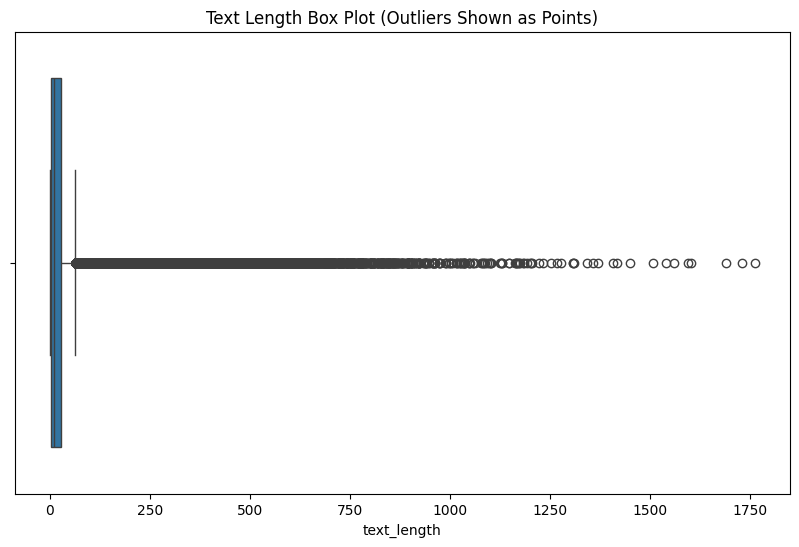

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_removed_bot['text_length'])
plt.title('Text Length Box Plot (Outliers Shown as Points)')
plt.show()

In [24]:
lower_bound = df_removed_bot['text_length'].median()  # 12 characters
upper_bound = df_removed_bot['text_length'].quantile(0.95)  # 95th percentile

print(f"Keeping texts between {lower_bound} and {upper_bound} characters")

Keeping texts between 12.0 and 96.0 characters


In [25]:
df_filtered = df_removed_bot[(df_removed_bot['text_length'] > lower_bound) & 
                  (df_removed_bot['text_length'] <= upper_bound)]

print(f"Kept {len(df_filtered)} out of {len(df_removed_bot)} texts ({len(df_filtered)/len(df_removed_bot)*100:.2f}%)")

Kept 253303 out of 594588 texts (42.60%)


## Data cleaning: formatting, transformation

In [26]:
def clean_data(df):
    ''' 
    Given a dataframe mapping index numbers to unix date 
    and text information, produces a new dataframe with
    translated dates and cleaned text
    Input:
        df: a dataframe
    Output:
        cleaned_df: a dataframe
    '''
    # Create a copy of the dataframe
    cleaned_df = df.copy()
    
    # Convert the unix timestamp to readable date
    cleaned_df['date'] = cleaned_df['created_utc'].apply(
        lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')
    )
    
    # Clean the text
    cleaned_df['cleaned_text'] = cleaned_df['text'].apply(
        lambda x: re.sub(r'[^\w\s]', ' ', str(x)).replace('\n', ' ').strip()
    )
    
    return cleaned_df

In [27]:
cleaned_df = clean_data(df_filtered)
cleaned_df

/var/folders/7h/mx7nc7vj63551qp5lczzf1lr0000gn/T/ipykernel_40950/1567044766.py:16: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')


,subreddit,created_utc,text,author,text_length,date,cleaned_text
3,DeepSeek,1735328898,Those LLMs are notorious to not know who they ...,Anuclano,32,2024-12-27,Those LLMs are notorious to not know who they ...
7,DeepSeek,1735403916,Doesn't its system prompt states its name tho...,Positive_Average_446,35,2024-12-28,Doesn t its system prompt states its name thou...
8,DeepSeek,1735404424,I got this error when trying to log in with br...,Positive_Average_446,21,2024-12-28,I got this error when trying to log in with br...
11,DeepSeek,1735407361,"Ah yep just tested. Its prompt only say ""AI as...",Positive_Average_446,62,2024-12-28,Ah yep just tested Its prompt only say AI as...
14,DeepSeek,1735430664,I actually noticed that it falls back on using...,redswan_cosignitor,54,2024-12-29,I actually noticed that it falls back on using...
...,...,...,...,...,...,...,...
641951,ChatGPT,1740873374,This is the way. \n\nI fed it chapters of my b...,SeaBearsFoam,34,2025-03-01,This is the way I fed it chapters of my boo...
641952,ChatGPT,1740873374,"It's new, and people haven't developed the ""an...",headcanonball,30,2025-03-01,It s new and people haven t developed the an...
641954,ChatGPT,1740873403,>wants other humans to interact with his print...,Postmanpale,59,2025-03-01,wants other humans to interact with his prints...
641956,ChatGPT,1740873505,Yeah I always go back to the extreme growth an...,LiteSoul,22,2025-03-01,Yeah I always go back to the extreme growth an...


In [28]:
cleaned_df = cleaned_df.drop(columns=['text', 'text_length', 'created_utc'])
cleaned_df = cleaned_df.rename(columns = {'cleaned_text': 'text'})

In [29]:
cleaned_df['type'] = 'comments'
cleaned_df

,subreddit,author,date,text,type
3,DeepSeek,Anuclano,2024-12-27,Those LLMs are notorious to not know who they ...,comments
7,DeepSeek,Positive_Average_446,2024-12-28,Doesn t its system prompt states its name thou...,comments
8,DeepSeek,Positive_Average_446,2024-12-28,I got this error when trying to log in with br...,comments
11,DeepSeek,Positive_Average_446,2024-12-28,Ah yep just tested Its prompt only say AI as...,comments
14,DeepSeek,redswan_cosignitor,2024-12-29,I actually noticed that it falls back on using...,comments
...,...,...,...,...,...
641951,ChatGPT,SeaBearsFoam,2025-03-01,This is the way I fed it chapters of my boo...,comments
641952,ChatGPT,headcanonball,2025-03-01,It s new and people haven t developed the an...,comments
641954,ChatGPT,Postmanpale,2025-03-01,wants other humans to interact with his prints...,comments
641956,ChatGPT,LiteSoul,2025-03-01,Yeah I always go back to the extreme growth an...,comments


## to CSV

In [30]:
def to_csv(csvfilename, cleaned_df):
    '''
    Given a dataframe, writes it to a CSV file
    Input:
        csvfilename: a string representing the name of the output csv
        cleaned_df: a pandas DataFrame
    '''
    # Using pandas' built-in to_csv method (recommended)
    cleaned_df.to_csv(csvfilename, index=False)

In [31]:
to_csv('deepseek_chatgpt_cmts_data', cleaned_df)